# Scikit-Learn Jupyter Notebook

[Offical Documentation](https://scikit-learn.org/stable/)

***

## Python libaries

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Plot styles 

In [86]:
#default plot style
#plt.style.use('ggplot')
plt.style.use('seaborn')


#default plot size
plt.rcParams['figure.figsize'] = [12, 6]

***

## Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn

* REF: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

[link to aticle](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)



### Reading in dataset

* Import dataset from Seaborn
* Dataset part of seaborn built-in datasets

In [87]:
df = sns.load_dataset("penguins")

* View first 10 rows of the dataset

In [88]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


##### 1. Datatypes

In [89]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

* *species*, *island* and *sex* data type is an object and the rest at floating point numbers

##### 2. Summary Statistics

In [90]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [91]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


##### 3. Null Value check

In [92]:
display(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

* *Species* and *island* columns contain no **NULL** values
* *Sex* contains 11 **NULL* values

We can print off the object (categorical) data types to see the unique values.

In [93]:
#print unique values of categorical data
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

#% summary of missing values
print("")
print("% Missing sex data")
print(df['sex'].isnull().sum()/len(df))
print("")
print("% Missing bill_length_mm/bill_dept_mm/flipper_length/body_mass_g")
print(df['bill_length_mm'].isnull().sum()/len(df))


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]

% Missing sex data
0.03197674418604651

% Missing bill_length_mm/bill_dept_mm/flipper_length/body_mass_g
0.005813953488372093


##### 4. Handling missing values
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

* Approx 3% of the data in the sex column is missing. This is a bit high to completley remove especially in a small dataset
* The null values in the *sex* column will be replaced by the value that appears most frequently i.e. *mode*
* The null values in the numerical columns will be replaced by the the mean of them columns.
* Just over 0.5% of the data in these columns are missing so the mean is a sensible option

In [94]:
#calculating mode for sex column
mode_sex = df['sex'].mode()[0]  
df['sex'].fillna(mode_sex,inplace=True)

#replacing column with mode filled in
df['sex'] = df['sex'].str.replace(".",mode_sex)

#check sex for nulls
print(df['sex'].unique())
print('Now only two unique values for sex')

['Male' 'Female']
Now only two unique values for sex


In [95]:
#apply mean value for other columns with null values
df['bill_length_mm'].fillna(df.groupby('species')['bill_length_mm'].transform('mean'),inplace=True)
df['bill_depth_mm'].fillna(df.groupby('species')['bill_depth_mm'].transform('mean'),inplace=True)
df['flipper_length_mm'].fillna(df.groupby('species')['flipper_length_mm'].transform('mean'),inplace=True)
df['body_mass_g'].fillna(df.groupby('species')['body_mass_g'].transform('mean'),inplace=True)

display(df.isnull().sum())
print("")
print('No null values reamain')

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


No null values reamain


##### 5. Re run of Summary Statistics

In [96]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.917431,17.148339,200.930641,4202.839182
std,5.454118,1.973561,14.060613,801.461347
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.575000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.250000,4756.250000
max,59.600000,21.500000,231.000000,6300.000000


In [97]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,344.000000,344.000000,344.000000,344.000000,344
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,179
mean,NaN,NaN,43.917431,17.148339,200.930641,4202.839182,NaN
std,NaN,NaN,5.454118,1.973561,14.060613,801.461347,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.200000,15.575000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.250000,4756.250000,NaN


We can observe from re running the summary statistics that using the mean for the floating point data to replace null values has had very little effect.

Now we have a complete dataset to work with.

<br>

***

### Data Visualisation

* Perform and Exporatory Data Analysis on the Dataset

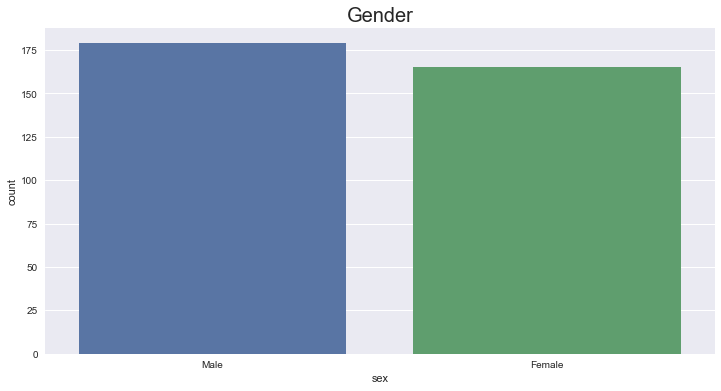

In [98]:
sns.countplot(x='sex',data=df).set_title('Gender',fontsize=20);

* Gender breakdown in the datset seem almost equal between male and female 

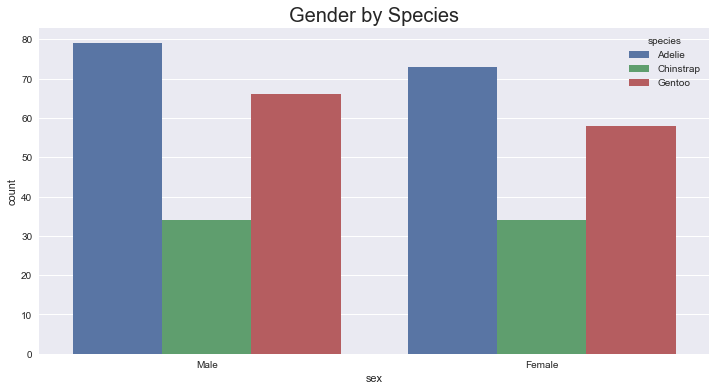

In [99]:
sns.countplot(x='sex',data=df,hue='species').set_title('Gender by Species',fontsize=20);

* We can observe an equal gender breakdown per species

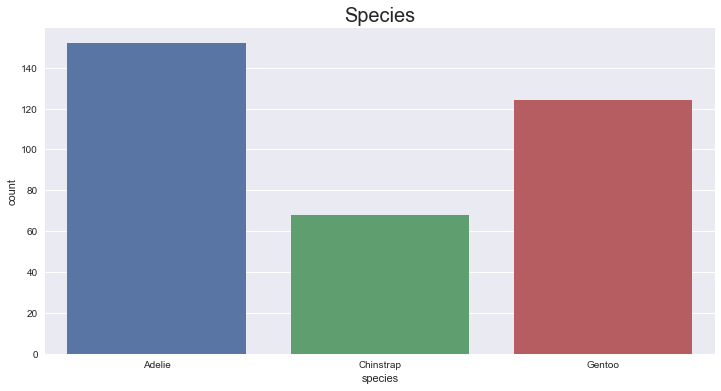

In [100]:
sns.countplot(x='species',data=df).set_title('Species',fontsize=20);

* Adelie is the most common species in the datset followed by Gentoo and then Chinstrap

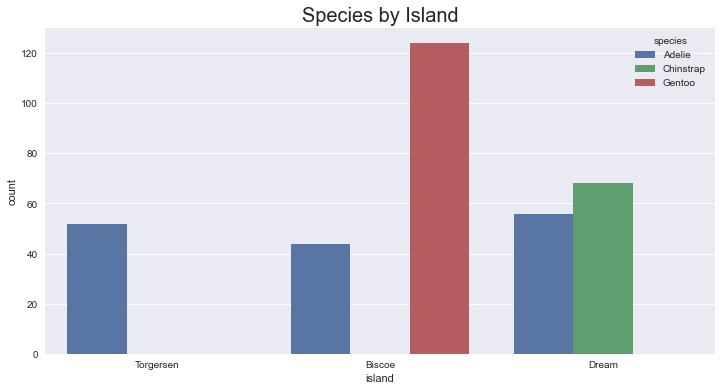

In [101]:
sns.countplot(x='island',data=df,hue='species').set_title('Species by Island',fontsize=20);

* Adelie is the only species found in the three different islands in the dataset. The other two species are only found on one island.

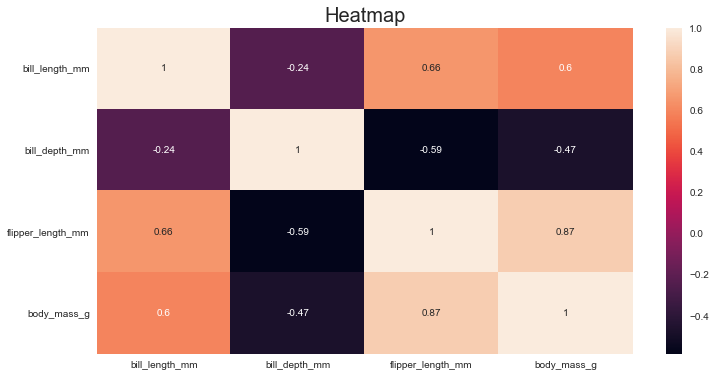

In [102]:
sns.heatmap(df.corr(),annot=True).set_title('Heatmap',fontsize=20);

* Correlation
 * The closer you get to 1 indicates a stroong postive correlation
 * The closer you get to -1 indicates a strong negative correlation
 * The closer you get to 0 indicates very little correlation


* There is a strong postitive correlation between flipper length and body mass (0.87)
* There is a postive correlation between flipper length and bill length (0.66)
* There is a postive correlation between body_mass and bill length (0.66)

In [103]:
#sns.pairplot(df,hue='species');

* Observing the pairplot, there appears to be somewhat of a seperation of species with:
    * bill_length:body_mass
    * bill length: flipper_length
    * bill_length: bill_depth
    
* we can plot these individually

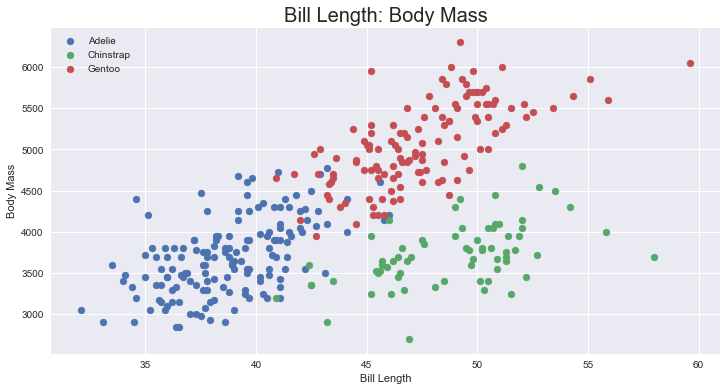

In [104]:
# Segregate the data.
#'Adelie' 'Chinstrap' 'Gentoo'
#
adelie = df[df['species'] == 'Adelie']
chinstrap = df[df['species'] == 'Chinstrap']
gentoo = df[df['species'] == 'Gentoo']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['body_mass_g'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['body_mass_g'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['body_mass_g'], label='Gentoo')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Body Mass')
ax.legend()
ax.set_title('Bill Length: Body Mass',fontsize=20);

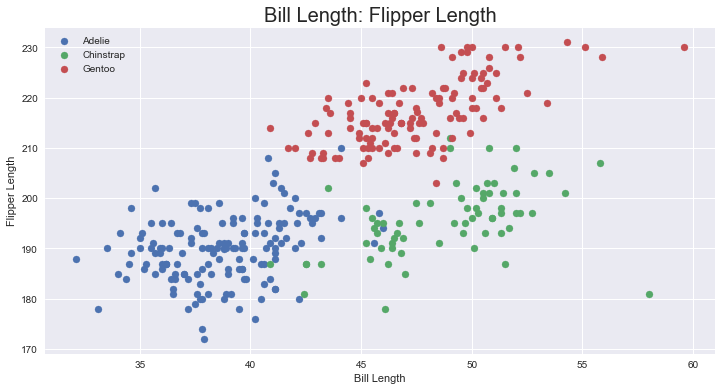

In [105]:
# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['flipper_length_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['flipper_length_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['flipper_length_mm'], label='Gentoo')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Flipper Length')
ax.legend()
ax.set_title('Bill Length: Flipper Length',fontsize=20);

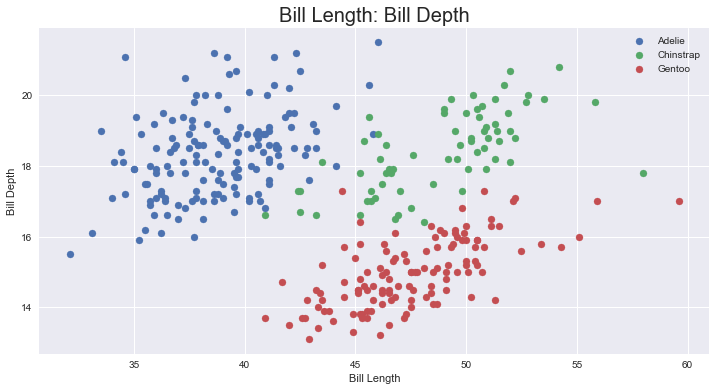

In [106]:
# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['bill_depth_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['bill_depth_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['bill_depth_mm'], label='Gentoo')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Bill Depth')
ax.legend()
ax.set_title('Bill Length: Bill Depth',fontsize=20);

* The above plots are the best examples of how the species can be seperated depending on the relative variables.
* We can perform a two dimensional KNN classification on any of these as an example. 
* For this example I am going to use Flipper Length and Bill Length
* After this we can perform the a KNN classification on all the data.

***

    
### KNeighborsClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### Split the dataset into train and test data
Now we will split the dataset into into training data and testing data. The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.

##### train_test_split function explanation

ref: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

* takes in 5 parameters. 

* The first two parameters are the input and target data we split up earlier. 

* ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. 

* Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.

* Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

Categorical Data apart from Species are to be dropped from the dataset

In [107]:
df = df.drop(['island','sex'],axis=1)

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.100000,18.700000,181.000000,3750.000000
1,Adelie,39.500000,17.400000,186.000000,3800.000000
2,Adelie,40.300000,18.000000,195.000000,3250.000000
3,Adelie,38.791391,18.346358,189.953642,3700.662252
4,Adelie,36.700000,19.300000,193.000000,3450.000000


In [109]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
train, test = train_test_split(df, test_size=0.2, random_state=42)#1,stratify=df['species'])
test

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
194,Chinstrap,50.9,19.1,196.0,3550.0
157,Chinstrap,45.2,17.8,198.0,3950.0
225,Gentoo,46.5,13.5,210.0,4550.0
208,Chinstrap,45.2,16.6,191.0,3250.0
318,Gentoo,48.4,14.4,203.0,4625.0
...,...,...,...,...,...
321,Gentoo,55.9,17.0,228.0,5600.0
172,Chinstrap,42.4,17.3,181.0,3600.0
73,Adelie,45.8,18.9,197.0,4150.0
76,Adelie,40.9,16.8,191.0,3700.0


In [110]:
test['species'].value_counts()

Adelie       32
Gentoo       21
Chinstrap    16
Name: species, dtype: int64

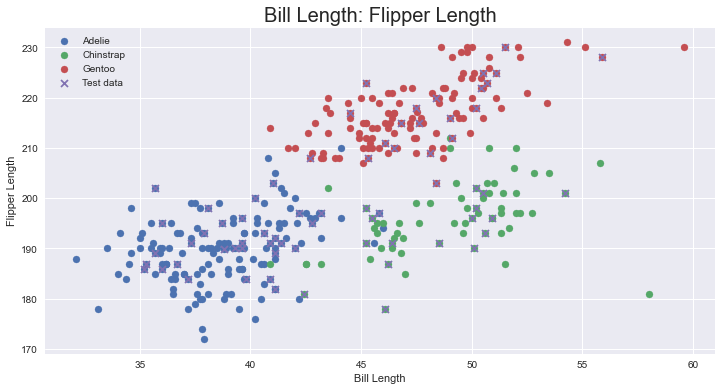

In [111]:
# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(adelie['bill_length_mm'], adelie['flipper_length_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['flipper_length_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['flipper_length_mm'], label='Gentoo')

ax.scatter(test['bill_length_mm'], test['flipper_length_mm'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Bill Length')
ax.set_ylabel('Flipper Length')
ax.legend()
ax.set_title('Bill Length: Flipper Length',fontsize=20);

#### Two Dimensions Inputs and Outputs

In [112]:
inputs, outputs = df[['bill_length_mm','flipper_length_mm']], df['species']

#### Building and training the model

In [113]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(inputs,outputs)

KNeighborsClassifier()

* First, we will create a new k-NN classifier to the default value of n_neighbors (5). To recap, this means that if at least 2 out of the 3 nearest points to an new data point are patients without diabetes, then the new data point will be labeled as ‘no diabetes’, and vice versa. In other words, a new data point is labeled with by majority from the 5 nearest points.

* We have set ‘n_neighbors’ to the default (5) as a starting point. We will go into more detail below on how to better select a value for ‘n_neighbors’ so that the model can improve its performance.

* Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data.

#### Testing the model

* Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.

In [114]:
#show first 5 model predictions on the test data
knn.predict(test[['bill_length_mm','flipper_length_mm']])[0:5]

array(['Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap'],
      dtype=object)


* let’s see how our accurate our model is on the full test set. 

* use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [115]:
#check accuracy of our model on the test data
knn.score(test[['bill_length_mm','flipper_length_mm']],test['species'])
test

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
194,Chinstrap,50.9,19.1,196.0,3550.0
157,Chinstrap,45.2,17.8,198.0,3950.0
225,Gentoo,46.5,13.5,210.0,4550.0
208,Chinstrap,45.2,16.6,191.0,3250.0
318,Gentoo,48.4,14.4,203.0,4625.0
...,...,...,...,...,...
321,Gentoo,55.9,17.0,228.0,5600.0
172,Chinstrap,42.4,17.3,181.0,3600.0
73,Adelie,45.8,18.9,197.0,4150.0
76,Adelie,40.9,16.8,191.0,3700.0


In [116]:
#predictions variable
predictions = knn.predict(test[['bill_length_mm','flipper_length_mm']])

##### Two Dimensions Misclassified


In [117]:
test['predictions'] = predictions

misclass = test[test['predictions'] != test['species']]
print("-----------------------------------------")
print("The number of species misclassed is: ",len(misclass))
print("-----------------------------------------")
test['species'].value_counts()

-----------------------------------------
The number of species misclassed is:  5
-----------------------------------------


<ipython-input-117-0c4f6ba1c48d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


Adelie       32
Gentoo       21
Chinstrap    16
Name: species, dtype: int64

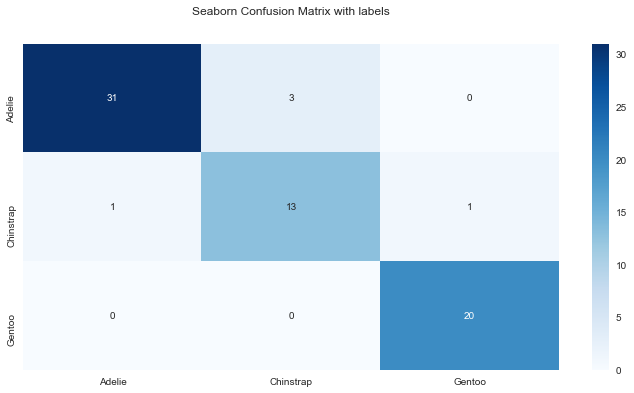

In [118]:
# https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test['predictions'], test['species'])



#print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
ax.yaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
plt.show();

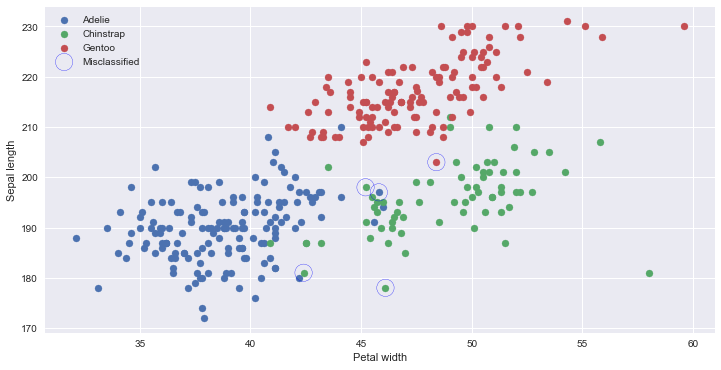

In [119]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
ax.scatter(adelie['bill_length_mm'], adelie['flipper_length_mm'], label='Adelie')
ax.scatter(chinstrap['bill_length_mm'], chinstrap['flipper_length_mm'], label='Chinstrap')
ax.scatter(gentoo['bill_length_mm'], gentoo['flipper_length_mm'], label='Gentoo')

    
# Plot misclassified.
ax.scatter(misclass['bill_length_mm'], misclass['flipper_length_mm'], s=300, facecolor='none', edgecolor='b', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

* In the above plot the missclassfied data are circled

### Using all inputs

In [120]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
train, test = train_test_split(df, test_size=0.2, random_state=42)#,stratify=df['species'])

#### Inputs and Outputs

In [121]:
inputs, outputs = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']], df['species']

#### Building and fitting the model

In [122]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(inputs,outputs)

KNeighborsClassifier()

#### Testing the model

* Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data.

In [123]:
predictions = knn.predict(test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])


In [124]:
knn.score(test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']],test['species'])

0.7971014492753623

* Using all the data our model score has reduced to approx .79
* Both models so far have been built using the defaut *n_neighbor* value of 5. 
* Next applying Cross-Validation and Hypertuning we can identify the best *n_neighbor* to apply

##### Misclassified

In [127]:
test['predictions'] = predictions

misclass = test[test['predictions'] != test['species']]
print("-----------------------------------------")
print("The number of species misclassed is: ",len(misclass))
print("-----------------------------------------")
test['species'].value_counts()

-----------------------------------------
The number of species misclassed is:  14
-----------------------------------------


<ipython-input-127-0c4f6ba1c48d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


Adelie       32
Gentoo       21
Chinstrap    16
Name: species, dtype: int64

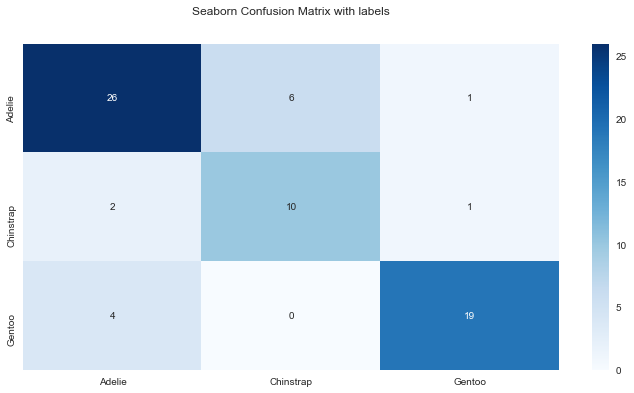

In [128]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test['predictions'], test['species'])



#print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
ax.yaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
plt.show();

#### k-Fold Cross-Validation

* Cross-validation is when the dataset is randomly split up into ‘k’ groups. 
* One of the groups is used as the test set and the rest are used as the training set. 
* The model is trained on the training set and scored on the test set. 
* Then the process is repeated until each unique group as been used as the test set.
* For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set.

* The train-test-split method we used in earlier is called ‘holdout’. 
* Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. * Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

* In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. * ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. 
* We will save the accuracy scores in the ‘cv_scores’ variable.
* To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [129]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier()
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, inputs, outputs, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.72463768 0.79710145 0.72463768 0.82608696 0.89705882]
cv_scores mean:0.7939045183290708


* Using cross-validation, our mean score is about 79%. 
* This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

#### Hypertuning model parameters using GridSearchCV
* When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 3 as a starting point with no real logic behind that choice.
* Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. 
* In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.
* GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
* For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. 
* To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.
* Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [130]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(inputs, outputs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [131]:
knn_gscv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

* After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. 
* To do this, we will call ‘best_params_’ on our model.

In [132]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

* We can see that 1 is the optimal value for ‘n_neighbors’. 
* We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 1. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

In [133]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8519607843137255

In [134]:
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(inputs,outputs)




GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [135]:
#create variables for different results
knn_params = knn_gscv.cv_results_['params']
rank_test_score = knn_gscv.cv_results_['rank_test_score']
mean_test_score = knn_gscv.cv_results_['mean_test_score']

* A dataframe is created to store the cross validation resuts

In [136]:
res = pd.DataFrame(knn_params)
res['Rank Score'] = rank_test_score
res['Mean Score'] = mean_test_score

print(res[res['Mean Score']==res['Mean Score'].max()])


   n_neighbors  Rank Score  Mean Score
0            1           1    0.851961


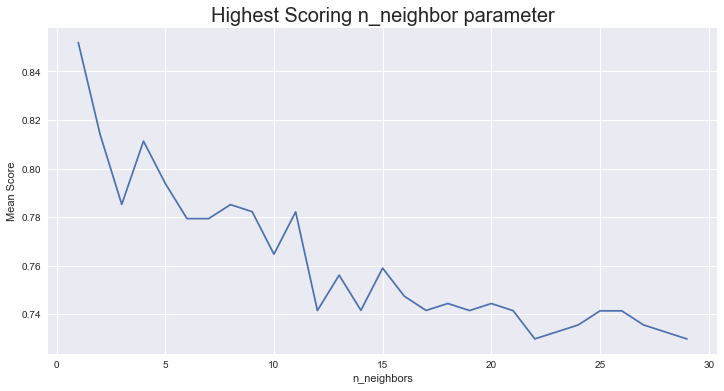

In [137]:
sns.lineplot(y='Mean Score',x='n_neighbors',data=res).set_title('Highest Scoring n_neighbor parameter',fontsize=20);

* Observing the above plot, we see that the highest score *n_neighbor* is 1

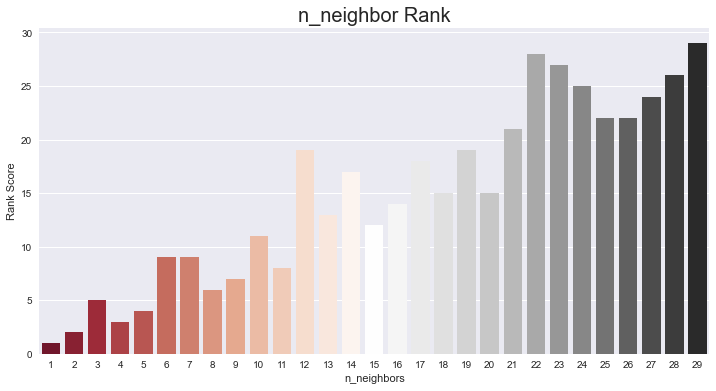

In [138]:
sns.barplot(y='Rank Score',x='n_neighbors',data=res,palette='RdGy').set_title('n_neighbor Rank',fontsize=20);

* We can observefrom the barplot above that *n_neighbor* 1 is ranked in 1st place

### KNN nearest neighbours Iris

* we cn repeat the same steps to run a KNN model with the Iris dataset

* load in iris data set

In [152]:
#load iris dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* visualise with pairplot, hue being species

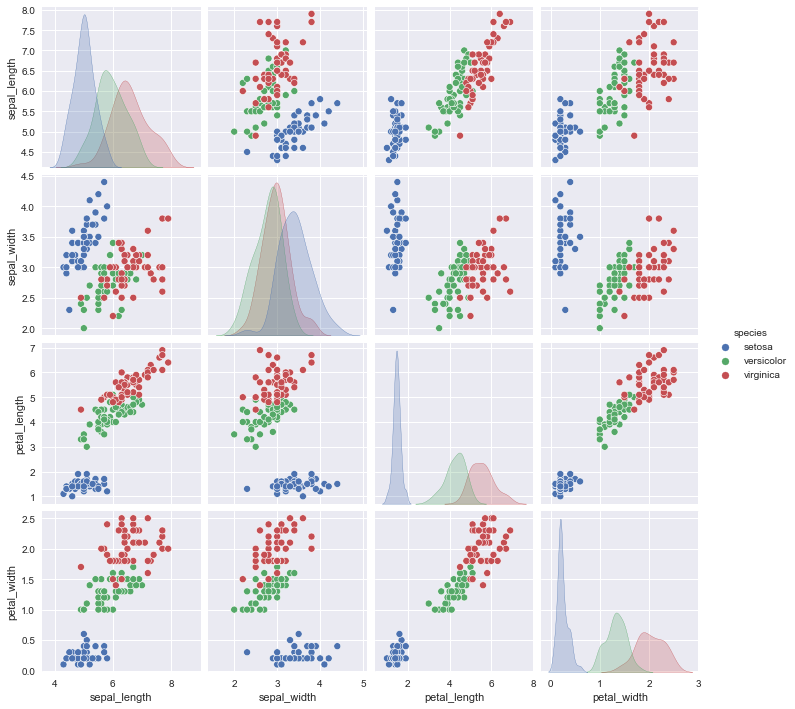

In [153]:
sns.pairplot(df,hue="species");

### Inputs and Outputs

* Data being split up into inputs and targets. 
* The species type is what is trying to be predicted. 
* This is takien out of the main dateaet simailar to the article above based on doabetes data

In [154]:
inputs= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['species']

### Classifier

In [155]:
knn = KNeighborsClassifier()

### Train data

In [156]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs,outputs,test_size=0.2, random_state=42)#,stratify=outputs)

#### Fit Model

In [157]:
#knn = KNeighborsClassifier()#n_neighbors=6)
knn.fit(inputs_train,outputs_train)

KNeighborsClassifier()

#### Evaluate

In [158]:
(knn.predict(inputs_test) == outputs_test).sum()


30

In [160]:
(knn.predict(inputs_test) == outputs_test).value_counts()
df['pred'] =knn.predict(inputs)
df['c'] = df['species'] == df['pred']
(df['species'] == df['pred']).sum()
df.loc[df['c']==False]

,sepal_length,sepal_width,petal_length,petal_width,species,pred,c
70,5.9,3.2,4.8,1.8,versicolor,virginica,False
72,6.3,2.5,4.9,1.5,versicolor,virginica,False
83,6.0,2.7,5.1,1.6,versicolor,virginica,False
106,4.9,2.5,4.5,1.7,virginica,versicolor,False


### k-Fold Cross-Validation

In [161]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier()
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, inputs,outputs, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
cv_scores mean:0.9733333333333334


### GridSearch

In [162]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn3 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5)
#fit model to data
knn_gscv.fit(inputs,outputs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

#### Best value to use

In [163]:
knn_gscv.best_params_

{'n_neighbors': 6}

* n_neightbour value of 6 the optium value to use post cross validation

In [164]:
knn_gscv.best_score_

0.9800000000000001

In [165]:
#create variables for different results
knn_params = knn_gscv.cv_results_['params']
rank_test_score = knn_gscv.cv_results_['rank_test_score']
mean_test_score = knn_gscv.cv_results_['mean_test_score']

In [166]:
res = pd.DataFrame(knn_params)
res['Rank Score'] = rank_test_score
res['Mean Score'] = mean_test_score

print(res[res['Mean Score']==res['Mean Score'].max()])
#res[res.groupby(['n_neighbors'])['Mean Score'].transform(max) == res['Mean Score']].set_index('n_neighbors')


    n_neighbors  Rank Score  Mean Score
5             6           1        0.98
6             7           1        0.98
9            10           1        0.98
10           11           1        0.98
11           12           1        0.98


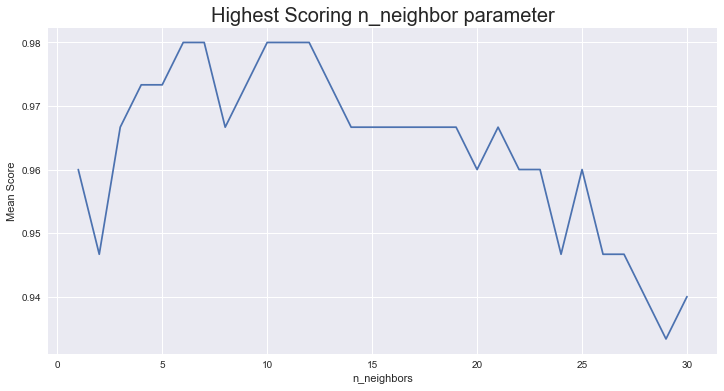

In [167]:
sns.lineplot(y='Mean Score',x='n_neighbors',data=res).set_title('Highest Scoring n_neighbor parameter',fontsize=20);

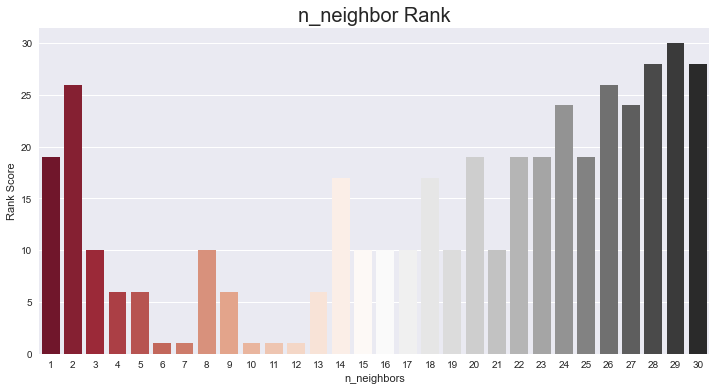

In [168]:
sns.barplot(y='Rank Score',x='n_neighbors',data=res,palette='RdGy').set_title('n_neighbor Rank',fontsize=20);

* With the iris datset, the best paramter for *n_neighbors* is 6. However 7,10,11 and 12 return approx the same mean score

***

## Regression

***

### Simple Linear Regression

$$ y = 2 x + 1$$

The number $m$ is the slope if the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The $c$ is the y-intercept of the line. It is the value of $y$ when $x$ is at zero.

A simple linear regression estimates the relationship between the values. In the following dataset this is speed and power. Performing a linear regression on this dataset we can identify how strong the relationship is between these two variables. Power is dependent on Speed (independent).

***

##### Read in Dataset

In [169]:
#import dataset
ps = pd.read_csv('datasets/powerproduction.txt')

##### Summary Stats of Dataset

In [170]:
#summarry statistics
ps.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


##### Data types in dataset

In [171]:
#datatypes
ps.dtypes

speed    float64
power    float64
dtype: object

##### Shape of dataset

- 500 rows and two columns

In [172]:
ps.shape

(500, 2)

##### Plotting the Data

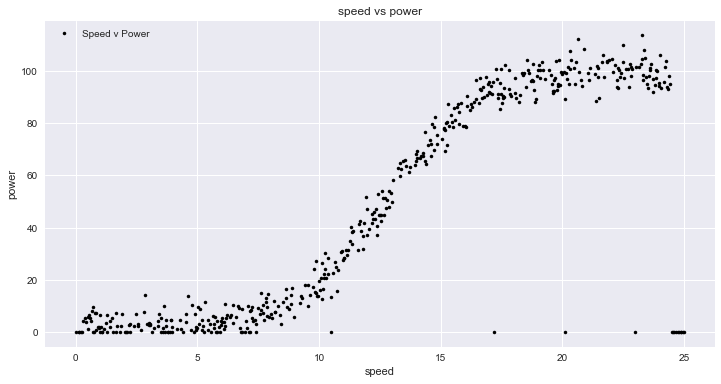

In [173]:
#plotting the dataset
plt.plot(ps['speed'],ps['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{ps.columns[0]} vs {ps.columns[1]}')
plt.xlabel(f'{ps.columns[0]}')
plt.ylabel(f'{ps.columns[1]}')
plt.legend();

##### Split up the dataset into inputs and targets

In [174]:
import numpy as np
X = ps['speed'].values
y = ps['power'].values



X = X.reshape(-1, 1)


##### Split data into training and test sets

- 33% of the data held back in test dataset

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2,random_state=1)

In [176]:
print(f'Length of Training dataset is {len(X_train)}')
print(f'Length of Test dataset is {len(X_test)}')
print(f'Together that sums up to the total length of the oroignal data set: {len(X_train)+len(X_test)}')

Length of Training dataset is 400
Length of Test dataset is 100
Together that sums up to the total length of the oroignal data set: 500


##### Import sklearn linear model

In [177]:
import sklearn.linear_model as lm

##### Fitting the model

In [178]:
model = lm.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

##### Model score and predictions

In [179]:
print(f'Model has an accuarcy score of {model.score(X_train, y_train)}')

y_pred = model.predict(X_test)

Model has an accuarcy score of 0.7494259815380628


In [180]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 16.85279938930505
Mean Squared Error: 627.2428554155053
R2 Score: 0.6456959019133406


##### For comparison Dataframe

In [181]:
m1_score = model.score(X_train, y_train)
m1_mae = metrics.mean_absolute_error(y_test,y_pred)
m1_mse = metrics.mean_squared_error(y_test,y_pred)
m1_r2 = metrics.r2_score(y_test,y_pred)
m1_rmse = np.sqrt(m1_mse)
print(m1_rmse)

25.04481693715299


##### Fitting Best Line

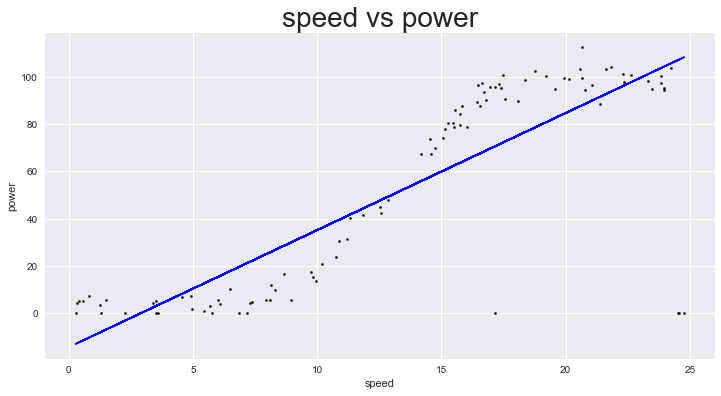

In [182]:
plt.scatter(X_test,y_test,color='black',s=5)
plt.plot(X_test,y_pred,color='blue',linewidth=1.5)
plt.title(f'{ps.columns[0]} vs {ps.columns[1]}',fontsize=28)
plt.xlabel(f'{ps.columns[0]}')
plt.ylabel(f'{ps.columns[1]}');

#### Outliers

There are a number of zero values for power when speed is greater than zero. We may view these as outliers, incorrect measurements or some anomoly in the data. We will fit a line with and without these values and look at the comparison. A new dataset will be created removing these outliers


In [183]:
#remove outliers
ps_c = ps[ps['power']!=0].reset_index()


##### Plot of data without zero values

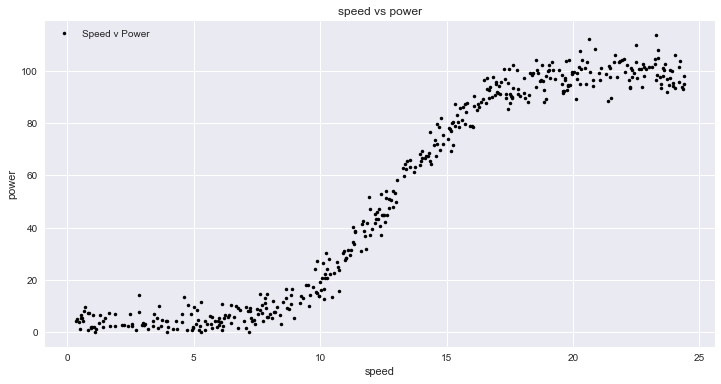

In [184]:
#plotting the dataset
plt.plot(ps_c['speed'],ps_c['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{ps_c.columns[1]} vs {ps_c.columns[2]}')
plt.xlabel(f'{ps_c.columns[1]}')
plt.ylabel(f'{ps_c.columns[2]}')
plt.legend();

##### Split up the dataset into inputs and targets

In [185]:
X = ps_c['speed'].values
y = ps_c['power'].values



X = X.reshape(-1, 1)
#y = y.reshape(-1,1)

##### Split data into training and test sets

- 33% of the data held back in test dataset

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33,random_state=1)

In [187]:
print(f'Length of Training dataset is {len(X_train)}')
print(f'Length of Test dataset is {len(X_test)}')
print(f'Together that sums up to the total length of the oroignal data set: {len(X_train)+len(X_test)}')

Length of Training dataset is 302
Length of Test dataset is 149
Together that sums up to the total length of the oroignal data set: 451


##### Fitting the model

In [188]:
model2 = lm.LinearRegression()

model2.fit(X_train, y_train)

LinearRegression()

##### Model score and predictions

In [189]:
print(f'Model has an accuarcy score of {model2.score(X_train, y_train)}')

y_pred = model2.predict(X_test)
tpred = model2.predict([[20]])
tpred

Model has an accuarcy score of 0.8973193989738559


array([91.57975352])

In [190]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 11.174646916597442
Mean Squared Error: 163.45843607408207
R2 Score: 0.8994833778494187


In [191]:
compare = pd.DataFrame({'actual':y_test,'predicted':y_pred})

##### For comparison Dataframe

In [192]:
m2_score = model2.score(X_train, y_train)
m2_mae = metrics.mean_absolute_error(y_test,y_pred)
m2_mse = metrics.mean_squared_error(y_test,y_pred)
m2_r2 = metrics.r2_score(y_test,y_pred)
m2_rmse = np.sqrt(m2_mse)
print(m2_rmse)

12.785086471122597


##### Fitting Best Line

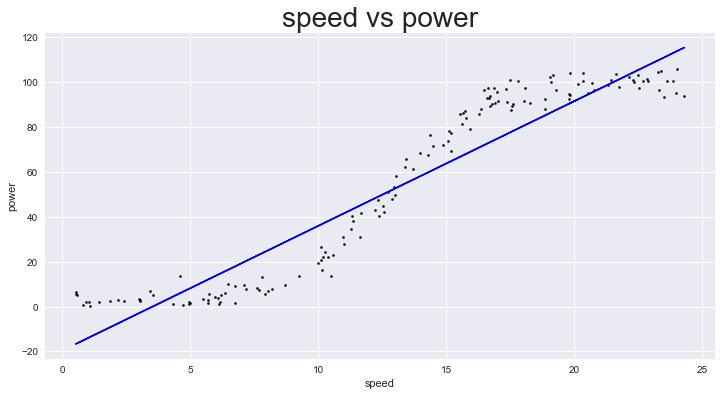

In [193]:
plt.scatter(X_test,y_test,color='black',s=5)
plt.plot(X_test,y_pred,color='blue',linewidth=1.5)
plt.title(f'{ps_c.columns[1]} vs {ps_c.columns[2]}',fontsize=28)
plt.xlabel(f'{ps_c.columns[1]}')
plt.ylabel(f'{ps_c.columns[2]}');

#### Comparison Datframe of Models

In [194]:
compare_df = pd.DataFrame(columns = ['Model Score','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R-squared'])

In [195]:
compare_df = compare_df.append({'Model Score':m1_score,'Mean Absolute Error':m1_mae,'Mean Squared Error':m1_mse,'Root Mean Squared Error':m1_rmse,'R-squared':m1_r2,'Model':'All Data'},ignore_index=True)
compare_df = compare_df.append({'Model Score':m2_score,'Mean Absolute Error':m2_mae,'Mean Squared Error':m2_mse,'Root Mean Squared Error':m2_rmse,'R-squared':m2_r2,'Model':'Outliers Removed'},ignore_index=True)

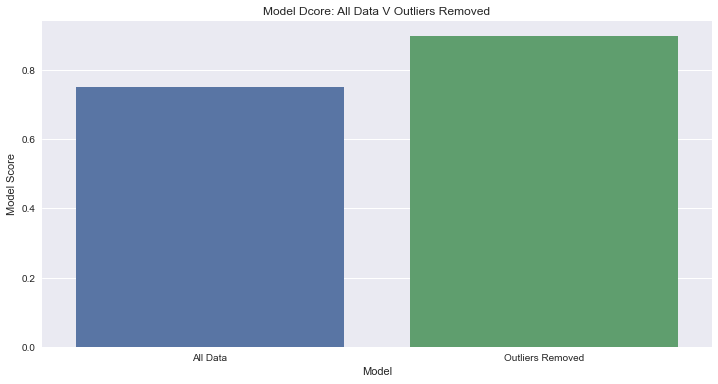

In [196]:
sns.barplot(x='Model',data=compare_df,y='Model Score');
plt.title('Model Dcore: All Data V Outliers Removed');

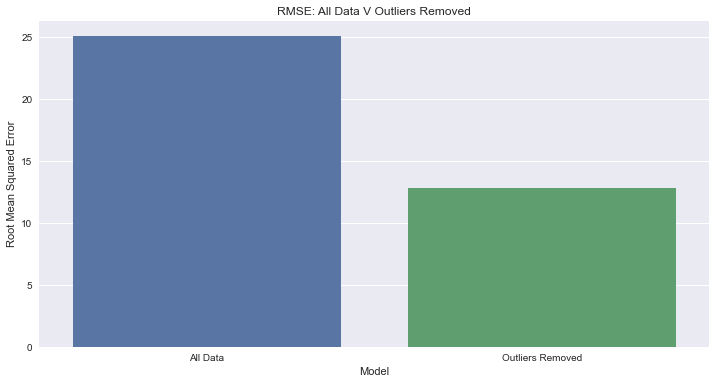

In [197]:
sns.barplot(x='Model',data=compare_df,y='Root Mean Squared Error');
plt.title('RMSE: All Data V Outliers Removed');

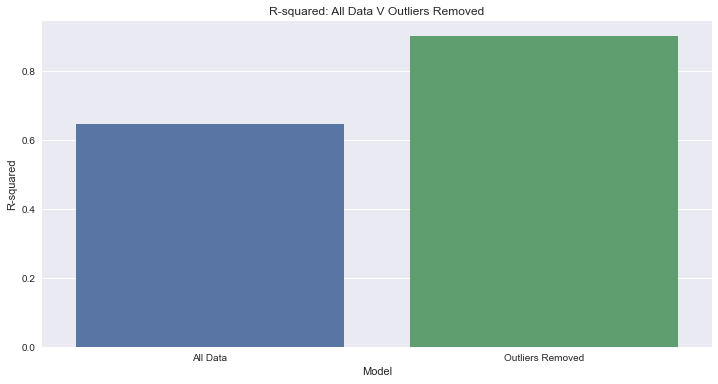

In [198]:
sns.barplot(x='Model',data=compare_df,y='R-squared');
plt.title('R-squared: All Data V Outliers Removed');

<br>

***

### Multiple Linear Regression

#### Dataset

* Combined Cycle Power Plant Data Set
* https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

##### Attribute Information
1. Hourly average ambient variables
2. Temperature (T) in the range 1.81°C and 37.11°C,
3. Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
4. Relative Humidity (RH) in the range 25.56% to 100.16%
5. Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
6. Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 


#### Reading in dataset

In [199]:
#dataset import
df = pd.read_csv('Datasets/cycle_power_plant.csv',sep=',')

#eyeball first 10 rows
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


#### summary statistics

In [200]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [201]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

#### Visualisation of Dataset

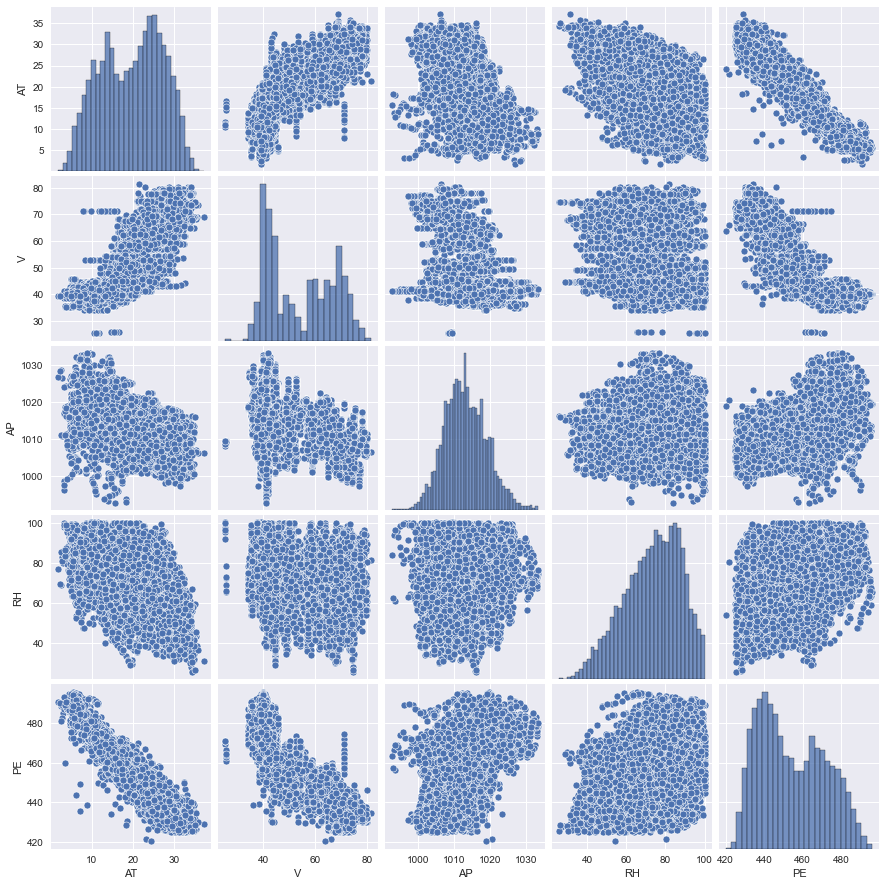

In [202]:
sns.pairplot(df);

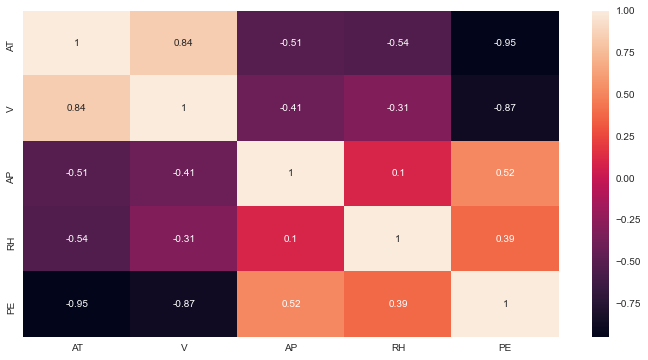

In [203]:
sns.heatmap(df.corr(),annot=True);

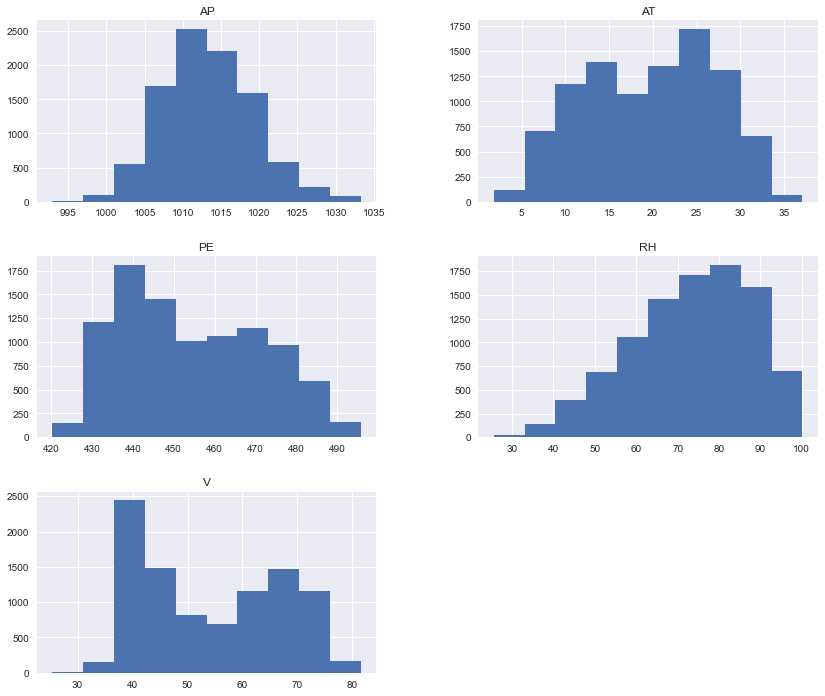

In [204]:
# Histograms
df.hist(bins=10,figsize=(14,12));

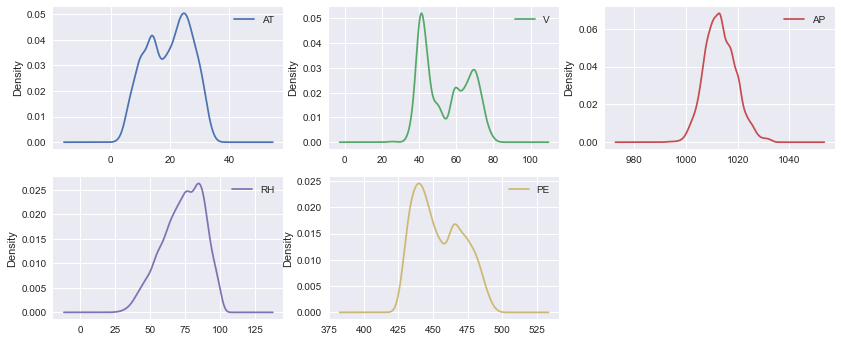

In [205]:
# Density
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False,figsize=(14,12));

#### Define Inputs and Outputs

* x independent variables
* y dependent variable

In [206]:
#independent variables
x = df.drop(['PE'],axis=1).values

#dependent variable
y= df['PE'].values


In [207]:
#check x
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [208]:
#check y
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


#### Split the dataset into train and test data
Now we will split the dataset into into training data and testing data. The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.

In [209]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Fitting the Model

In [210]:
model = lm.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

#### Predict Results

In [211]:
y_pred = model.predict(X_test)

#### Evaluate Model

In [212]:
m3_score = model.score(X_train, y_train)
m3_mae = metrics.mean_absolute_error(y_test,y_pred)
m3_mse = metrics.mean_squared_error(y_test,y_pred)
m3_r2 = metrics.r2_score(y_test,y_pred)
m3_rmse = np.sqrt(m3_mse)

print(f'Model has an accuarcy score of {m3_score}')
print(f'Model has an MAE of {m3_mae}')
print(f'Model has an MSE of {m3_mse}')
print(f'Model has an R2 score of {m3_r2}')
print(f'Model has an RMSE of {m3_rmse}')

Model has an accuarcy score of 0.9279441090358653
Model has an MAE of 3.598266124779356
Model has an MSE of 20.368383002885917
Model has an R2 score of 0.9304112159477682
Model has an RMSE of 4.51313449864791


#### Plot Results

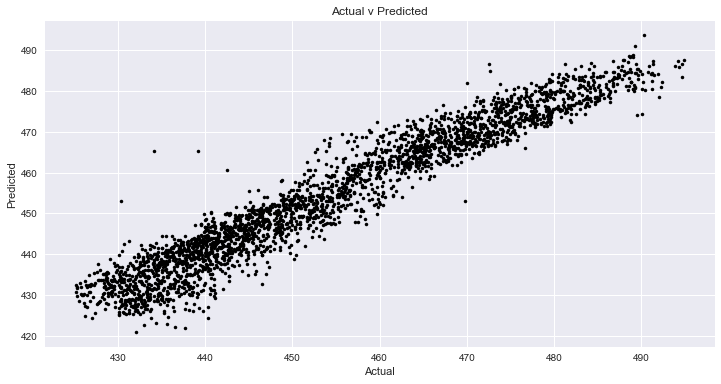

In [213]:
#new fig
fig, ax = plt.subplots()

#scatter plot
ax.plot(y_test,y_pred,'.',color='black')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual v Predicted');

#### Comparison Dataframe

* Create data frame comparing actuals values from y_test to predicted values

In [214]:
pred_y_df=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Values,Predicted Values,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
...,...,...,...
2866,475.86,472.027234,3.832766
2867,477.94,474.005522,3.934478
2868,426.86,432.473808,-5.613808
2869,433.40,436.164172,-2.764172


#### Visualising Actuals v Predicted

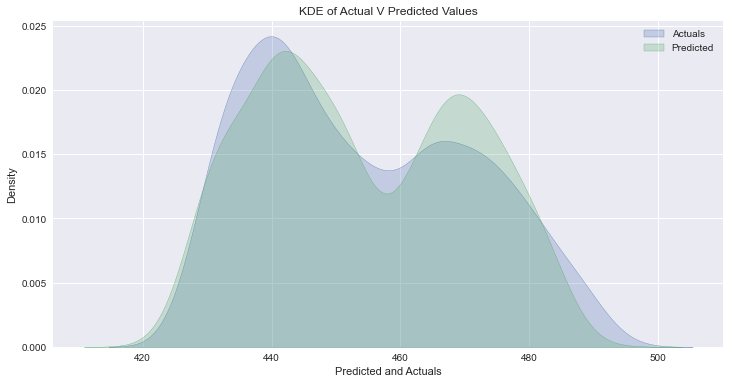

In [215]:
sns.kdeplot(pred_y_df['Actual Values'],fill =True,label='Actuals')
sns.kdeplot(pred_y_df['Predicted Values'],fill=True,label='Predicted');
plt.title('KDE of Actual V Predicted Values')
plt.xlabel('Predicted and Actuals')
plt.legend();

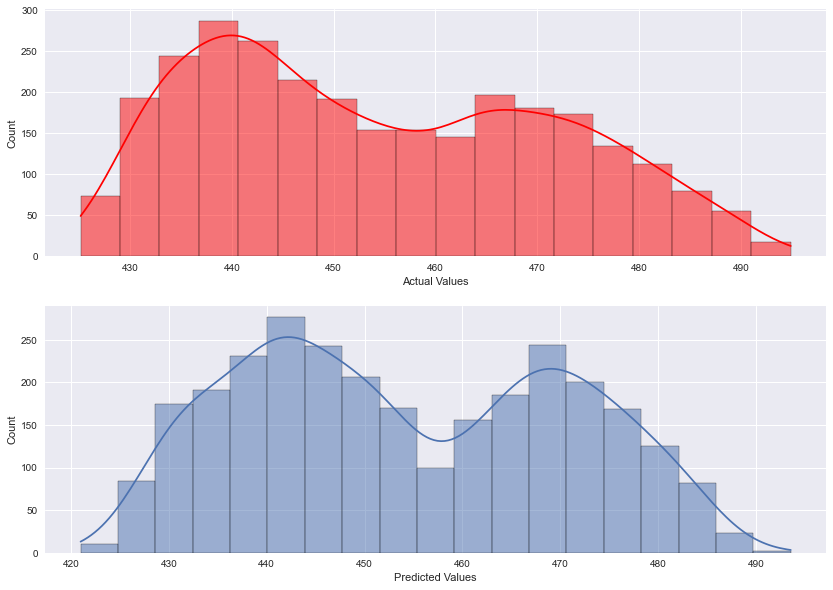

In [216]:
fig, ax = plt.subplots(2,2,figsize=(14,10))

plt.subplot(2,1,1)
sns.histplot(pred_y_df['Actual Values'],kde=True,color='r')

plt.subplot(2,1,2)
sns.histplot(pred_y_df['Predicted Values'],kde=True);

***
<br>

### Support Vector Machines

* build Support Vector Machine for classification
* Predict whther a person will default of their credit card or not
* SVM best for getting correct answer than understanding why
* great with smaller datasets
* doont require much optimisation


#### Import Python Libaries

In [117]:
import matplotlib.colors as colors
from sklearn.utils import resample # downsample database
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

#### Dataset
* https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
* attributes etc.
* Predict whther a person will default of their credit card or not

#### Import Dataset

In [118]:
#https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
df = pd.read_csv('Datasets/credit_cards.csv',header=1,sep=',')

#### First 5 rows

In [119]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [120]:
#column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### Dataset Columns
* ID: Customer Id
* LIMIT_BAL: Credit Limit
* SEX: Gender
* EDUCATION: Level of Education
* AGE: Age
* PAY_: When the last 6 bills were paid
* BILL_AMT: What last 6 bills were
* PAY_AMT: How much the last payments were

Last Column Name to be renamed Default

In [121]:
df.rename({'default payment next month':'DEFAULT'},axis='columns',inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


* ID column were randomly assigned so going to drop this column

In [122]:
df.drop('ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


***

#### Identifying Missing Data

* Options
* Remove data
* Impute the value

Check out datatypes

In [123]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

* No N/A values and all data are integers
* cross referencing with the dataset description from the UCI website, all data being integers matches this description

##### Examples
###### **Sex Category**
* 1 = male
* 2 = female

###### **Edcuation Category**
* 1 = grad school, 
* 2 = university, 
* 3 = high school, 
* 4 = others

###### **Marraige Category**
    * 1 = Married
    * 2 = Single
    * 3 = Other
 
###### **Age Category**
* integer
    
###### **PAY_ when the last 6 bills were paid** 
* -1 = paid on time
* 1 = payment delayed by one month
* 2 = payment delayed by two months
* ...
* 8 = payment delayed by eight months
* 9 = payment delayed by nine months or more!

###### **BILL_AMT**
* value of last 6 bills


###### **PAY_AMT**
* value of last 6 payments



 

#### Checking unique values

##### Sex Data
* should only contain **1** or **2**

In [124]:
print(df['SEX'].unique())

[2 1]


Correctly contains the values **1** or **2**

##### Education Data
* should only contain **1**,**2**,**3** or **4**

In [125]:
print(df['EDUCATION'].unique())

[2 1 3 5 4 6 0]


For unknown reasons this column also contains a **0**, **5** and **6**

##### Marraige Data
* should only contain **1** **2** or **3**

In [126]:
print(df['MARRIAGE'].unique())

[1 2 3 0]


For unknown reasons this column also contains a **0**


***

#### Dealing with Missing Data

* Sckit-learns SVM do not support datasets with missing values. 
* We can analyse the dataset for **0** values to see how much rows contain missing values
* Calculate the % missing values of the overall values in the dataset

In [127]:
#length of dataset
len_df = len(df)

#pipe to find 0 vals in education cat or marriage cat
missing_vals = len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

percentage_missing = missing_vals/len_df
print(percentage_missing)

0.002266666666666667


In [128]:
df = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] !=0)]
print("Length of the Dataset with zero values removed: ",len(df))

Length of the Dataset with zero values removed:  29932


##### Check for zero values now in MARRIAGE and SEX Columns

In [129]:
print(df['EDUCATION'].unique())
print(df['SEX'].unique())

[2 1 3 5 4 6]
[2 1]


#### Down Sample the Dataset
* SVM's work best with smaller datasets
* This dataset contains 29,932 rows
* Split dataset in two to get 1000 rows of people who defaulted and 1000 of people who didn't default

In [130]:
df_no_default = df[df['DEFAULT'] ==0]
df_default = df[df['DEFAULT'] ==1]
print("Number of no Defaults: ",len(df_no_default))
print("Number of Defaults: ",len(df_default))

Number of no Defaults:  23301
Number of Defaults:  6631


##### Create downsampled dataframes of 1000 samples

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
* https://machinelearningmastery.com/statistical-sampling-and-resampling/

In [131]:
df_no_default_sample = resample(df_no_default,replace=False,n_samples=1000,random_state=42)
print(len(df_no_default_sample))

1000


In [132]:
df_default_sample = resample(df_default,replace=False,n_samples=1000,random_state=42)
print(len(df_default_sample))

1000


##### Merge two sample datsets into a single dataset and check the length

In [133]:
df_downsample = pd.concat([df_no_default_sample,df_default_sample])
print(len(df_downsample))

2000


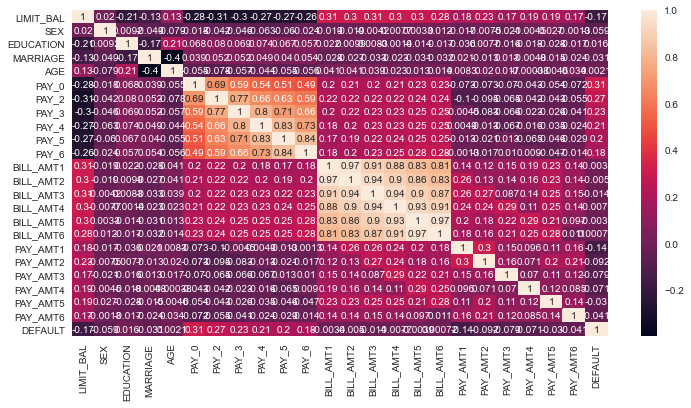

In [134]:
sns.heatmap(df_downsample.corr(),annot=True);

***

#### Split up the dataset into inputs and targets

In [135]:
X = df_downsample.drop('DEFAULT',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [136]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

***

#### One Hot Encoding
* looking at Marriage column for example, even though these are integers
* we need to classify these integers to look like a classifaction type rather tha a number value.
* Treating these as seperate categories means the SVM less likely to cluster 3 and 2 together rather than 3 and 1
* Seperate categories means the likelihood of clustering 3 and 2 is as likely and clustering 3 and 1

In [137]:
pd.get_dummies(X,columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


* *get_dummies* puts all the columns processed on right side of the dataframe
* Marriage is split into three columns
* MARRIAGE_1 is any person that had a 1 in the MARRIAGE column
* MARRIAGE_2 is any person that had a 2 in the MARRIAGE column
* MARRIAGE_3 is any person that had a 3 in the MARRIAGE column

We can now use get_dummies on all the categorical columns

In [138]:
X_encoded = pd.get_dummies(X, columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


***

#### Centering and Scaling

* The Radial Basis Function that we are using with our SVM assumes data is centered and scaled.
* This means each column should have a mean of **0** and a standard deviation of **1**

* Traing and Test dataets scaled seperatley to avoid data leakage
* Leakage occurs when info about the training dataset corrupts or influences the testing dataset

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=42) #defau;t test size applied

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

***


#### Build a prelilinary SVM



In [140]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

11970    1
29403    0
24710    1
10258    0
3618     1
        ..
26591    0
14214    1
11881    0
22825    1
8564     0
Name: DEFAULT, Length: 500, dtype: int64

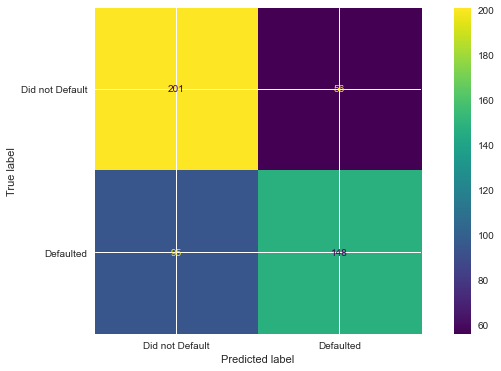

In [143]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',display_labels=['Did not Default','Defaulted']);


In [175]:
clf_svm.score(X_train_scaled, y_train)

0.7486666666666667

#### Cross Validation for optimisation

* We can use GridSreach to find the best value for **gamma&** and the potential regulisation of parameter **C**


In [176]:
param_grid=[
    {'C':[0.5,1,10,100],
    'gamma':['scale',1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']},]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
verbose=0)

optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


* Ideal value for **C** is 100
* Ideal value for **Gamma** is 0.001

***

#### Build, Evaluate and Interpret the Final SVM

* applying best params

In [177]:
clf_svm = SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [116]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',display_labels=['Did not Default','Defaulted']);
X_test_scaled

NameError: name 'clf_svm' is not defined

In [179]:
clf_svm.score(X_train_scaled, y_train)

0.7553333333333333

In [180]:
len(df_downsample.columns)

24

* 24 columns in the dataset
* we can use PCA Proncipal Component Analysis to combine features into a 2-D plot

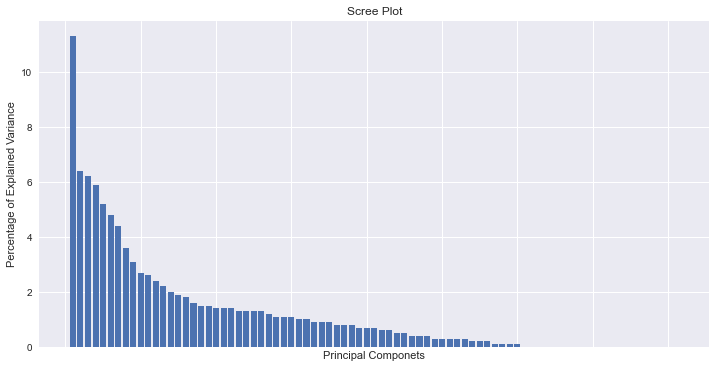

In [181]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(
    axis='x',         #changes apply to x-axis
    which = 'both',   # both major and minor ticks affected
    bottom=False,     # ticks along bottom edges are off
    top=False,        # ticks along top edges are off
    labelbottom=False)# labels along bottom edge are off

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Componets')
plt.title('Scree Plot');



##### scree plot



In [182]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords,train_pc2_coords)))

param_grid=[
    {'C':[0.5,1,10,100],
    'gamma':['scale',1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']},]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
verbose=0)

optimal_params.fit(pca_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [183]:
clf_svm = SVC(random_state=42,C=10,gamma=0.01)
clf_svm.fit(pca_train_scaled,y_train)

SVC(C=10, gamma=0.01, random_state=42)

In [184]:
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

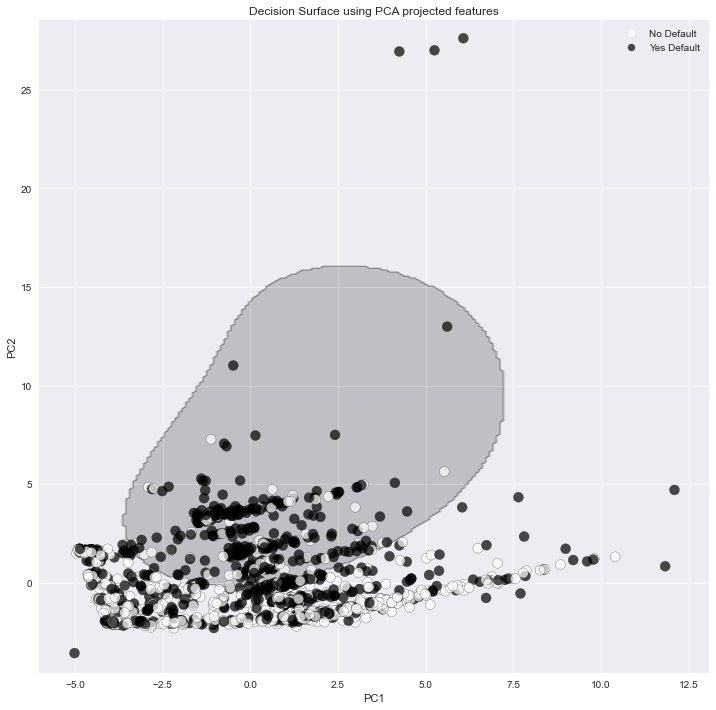

In [185]:
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max,step=0.1),
                    np.arange(start=y_min,stop=y_max,step=0.1))



Z = clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
#z is just a lon array of 0s and 1s
#reshape so each claffication corresponds to a specfic poin in matrix
Z=Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(12,12))

ax.contourf(xx,yy,Z,alpha=0.2)

scatter = ax.scatter(test_pc1_coords,test_pc2_coords,c=y_train,s=100,edgecolors='k',alpha=0.7)
                     
legend = ax.legend(scatter.legend_elements()[0],scatter.legend_elements()[1],loc='upper right')
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')
                     
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Surface using PCA projected features');
                     
                     
                     

## References

* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

***
# End